<a href="https://colab.research.google.com/github/Rellendula26/PersonalPortfolio-RitvikEllendula-/blob/ML-Projects/Brain_Age_Data_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_openml

# Load the EEG Motor Imagery dataset from OpenML
dataset = fetch_openml(data_id=41070, as_frame=True)

# Extract the features and labels
X = dataset.data
y = dataset.target

# Display the first few rows of the dataset
print(X.head())
print(y.head())


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:999: UserWarning: Version 1 of dataset USPS is inactive, meaning that issues have been found in the dataset. Try using a newer version from this URL: https://api.openml.org/data/v1/download/18805612/USPS.arff
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


    double1   double2   double3   double4   double5   double6   double7  \
0 -1.000000 -1.000000 -1.000000 -0.999997 -0.999729 -0.989537 -0.860165   
1 -0.999927 -0.993644 -0.900309 -0.632621 -0.443145 -0.454436 -0.474872   
2 -1.000000 -1.000000 -1.000000 -0.999995 -0.999986 -0.999987 -0.999990   
3 -0.999998 -0.999800 -0.994136 -0.932288 -0.673685 -0.192056  0.218820   
4 -1.000000 -0.999971 -0.997452 -0.957499 -0.801681 -0.510623 -0.107965   

    double8   double9  double10  ...  double247  double248  double249  \
0 -0.395924  0.048299 -0.282151  ...   0.131298   0.384728   0.433073   
1 -0.431176 -0.494539 -0.583648  ...  -0.388084  -0.273639   0.001094   
2 -0.999316 -0.976299 -0.725917  ...  -0.999778  -0.988816  -0.821857   
3  0.337224  0.193371 -0.065072  ...  -0.373861   0.196530   0.002823   
4  0.217262  0.216431 -0.008529  ...   0.214362   0.339240   0.458489   

   double250  double251  double252  double253  double254  double255  double256  
0   0.193397  -0.237439  -0.6

In [ ]:
# Check the shape of the dataset
print(f"Dataset shape: {X.shape}")

# Check the distribution of labels
print(y.value_counts())

# Display data types and any missing values
print(X.info())


Dataset shape: (9298, 256)
int0
1.0     1553
2.0     1269
3.0      929
5.0      852
7.0      834
4.0      824
10.0     821
8.0      792
6.0      716
9.0      708
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9298 entries, 0 to 9297
Columns: 256 entries, double1 to double256
dtypes: float64(256)
memory usage: 18.2 MB
None


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.layers import Dropout

# ... (previous code for loading and preprocessing data)

# One-hot encode the target labels
encoder = OneHotEncoder()
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1)).toarray()

# Define the model

model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer='l2'),
        Dropout(0.2),  # Add dropout after the first Dense layer
        Dense(32, activation='relu'),
        Dropout(0.2),  # Add dropout after the second Dense layer
        Dense(len(y.unique()), activation='softmax')
    ])

# Compile the model using categorical_crossentropy
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Loss function for one-hot encoded labels
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train_encoded, epochs=10, validation_split=0.2)


from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3)  # Stop if val_loss doesn't improve for 3 epochs
history = model.fit(X_train_scaled, y_train_encoded, epochs=10, validation_split=0.2, callbacks=[early_stopping])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.5914 - loss: 2.2591 - val_accuracy: 0.9292 - val_loss: 0.9105
Epoch 2/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8894 - loss: 0.9741 - val_accuracy: 0.9437 - val_loss: 0.5861
Epoch 3/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9133 - loss: 0.6427 - val_accuracy: 0.9494 - val_loss: 0.4168
Epoch 4/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9327 - loss: 0.4700 - val_accuracy: 0.9456 - val_loss: 0.3446
Epoch 5/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9271 - loss: 0.3938 - val_accuracy: 0.9526 - val_loss: 0.3026
Epoch 6/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9313 - loss: 0.3497 - val_accuracy: 0.9564 - val_loss: 0.2758
Epoch 7/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9367 - loss: 0.3339 - val_accuracy: 0.9538 - val_loss: 0.2667
Epoch 8/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9405 - loss: 0.3023 - val_accuracy: 0

In [ ]:
# Evaluate on the test set
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {test_acc}')

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1756 - loss: 490.0239
Test Accuracy: 0.189964160323143


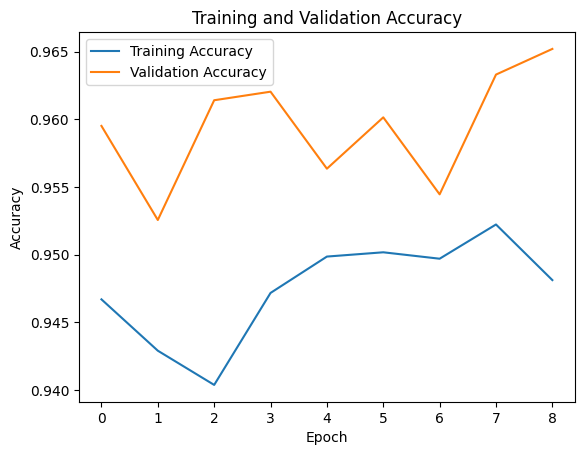

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
